In [1]:
import tensorflow as tf 
from tensorflow import keras

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [9]:
class_names[y_train[0]]

'Coat'

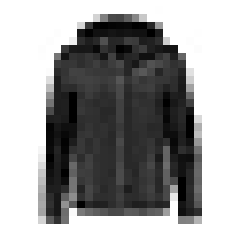

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

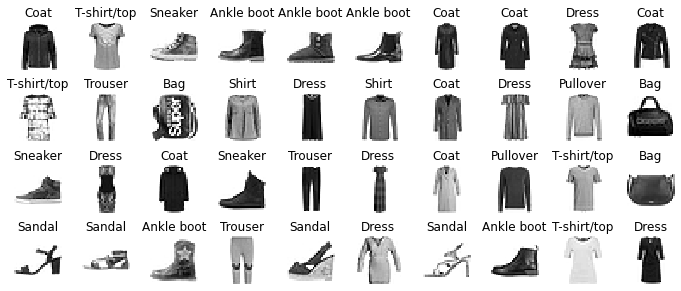

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


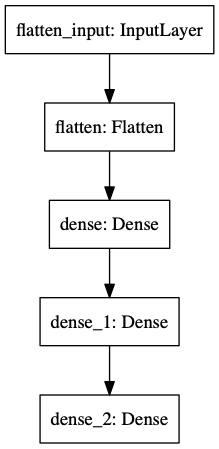

In [14]:
keras.utils.plot_model(model)

In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
weights, biases = hidden1.get_weights()
weights

array([[-0.00829121,  0.02546886, -0.06012976, ..., -0.05314855,
        -0.04449003, -0.05478444],
       [ 0.01778493, -0.03064865,  0.06556843, ..., -0.04044539,
         0.02808318,  0.01496046],
       [-0.01034867,  0.02516592,  0.01646974, ..., -0.00810623,
        -0.07405375, -0.02430464],
       ...,
       [ 0.01618246,  0.06390013, -0.01255533, ..., -0.05079066,
         0.03340685, -0.03001743],
       [ 0.0694771 ,  0.0615321 ,  0.01662739, ...,  0.00521164,
        -0.02403788, -0.05826204],
       [-0.03028747, -0.0172804 ,  0.03820684, ..., -0.05288332,
         0.00783279, -0.0358239 ]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='sgd',
             metrics=["accuracy"])

In [20]:
history = model.fit(X_train,y_train,epochs=30,
                   validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7174 - accuracy: 0.7627 - val_loss: 0.4997 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4871 - accuracy: 0.8283 - val_loss: 0.4611 - val_accuracy: 0.8408
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4440 - accuracy: 0.8434 - val_loss: 0.4154 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4163 - accuracy: 0.8535 - val_loss: 0.3983 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3963 - accuracy: 0.8603 - val_loss: 0.3917 - val_accuracy: 0.8634
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3787 - accuracy: 0.8650 - val_loss: 0.3668 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3653 - accuracy: 0.8713 - val_loss: 0.3723 - val_accuracy:

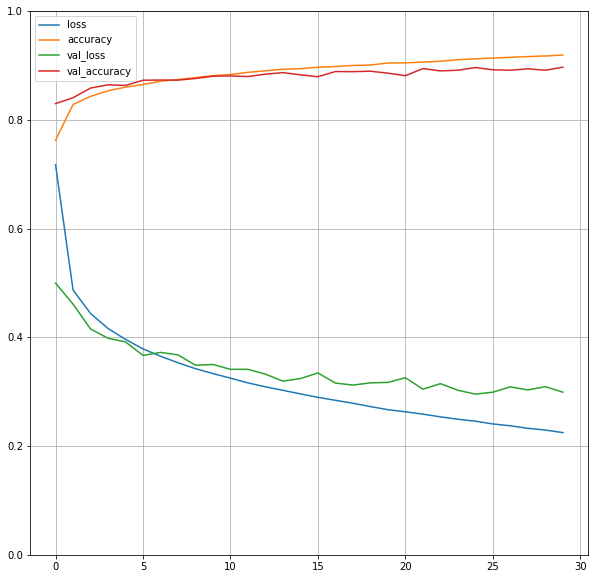

In [21]:
import pandas as pd 
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 70.4899 - accuracy: 0.8299


[70.48985290527344, 0.8299000263214111]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
import numpy as np
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

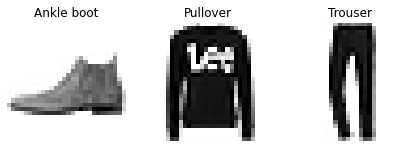

In [25]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)

In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 0s 879us/step - loss: 0.9142 - val_loss: 0.6011
Epoch 2/20
363/363 [==============================] - 0s 915us/step - loss: 0.5408 - val_loss: 0.4924
Epoch 3/20
363/363 [==============================] - 0s 939us/step - loss: 0.4679 - val_loss: 0.4659
Epoch 4/20
363/363 [==============================] - 0s 727us/step - loss: 0.4408 - val_loss: 0.4349
Epoch 5/20
363/363 [==============================] - 0s 652us/step - loss: 0.4286 - val_loss: 0.4213
Epoch 6/20
363/363 [==============================] - 0s 636us/step - loss: 0.4186 - val_loss: 0.4137
Epoch 7/20
363/363 [==============================] - 0s 631us/step - loss: 0.4136 - val_loss: 0.4106
Epoch 8/20
363/363 [==============================] - 0s 618us/step - loss: 0.4071 - val_loss: 0.3990
Epoch 9/20
363/363 [==============================] - 0s 648us/step - loss: 0.4016 - val_loss: 0.4048
Epoch 10/20
363/363 [==============================] - 0s 613us/step - loss: 0.399

In [28]:
mse_test

0.3669300973415375

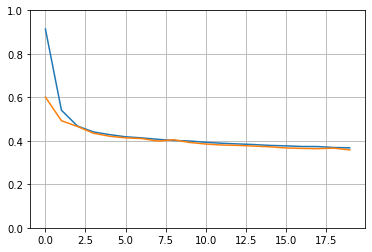

In [29]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [31]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 970us/step - loss: 2.6451 - val_loss: 1.1219
Epoch 2/20
363/363 [==============================] - 0s 692us/step - loss: 0.8795 - val_loss: 0.7576
Epoch 3/20
363/363 [==============================] - 0s 712us/step - loss: 0.7117 - val_loss: 0.6672
Epoch 4/20
363/363 [==============================] - 0s 749us/step - loss: 0.6442 - val_loss: 0.6189
Epoch 5/20
363/363 [==============================] - 0s 677us/step - loss: 0.6020 - val_loss: 0.5851
Epoch 6/20
363/363 [==============================] - 0s 675us/step - loss: 0.5739 - val_loss: 0.5627
Epoch 7/20
363/363 [==============================] - 0s 775us/step - loss: 0.5517 - val_loss: 0.5483
Epoch 8/20
363/363 [==============================] - 0s 778us/step - loss: 0.5349 - val_loss: 0.5334
Epoch 9/20
363/363 [==============================] - 0s 775us/step - loss: 0.5225 - val_loss: 0.5208
Epoch 10/20
363/363 [==============================] - 0s 696us/step - loss: 0.511

In [32]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [33]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))


In [34]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.0512 - main_output_loss: 2.8856 - aux_output_loss: 4.5416 - val_loss: 1.6327 - val_main_output_loss: 1.4142 - val_aux_output_loss: 3.5993
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.2150 - main_output_loss: 1.0257 - aux_output_loss: 2.9190 - val_loss: 0.9579 - val_main_output_loss: 0.7964 - val_aux_output_loss: 2.4113
Epoch 3/20
363/363 [==============================] - 0s 992us/step - loss: 0.8543 - main_output_loss: 0.7190 - aux_output_loss: 2.0720 - val_loss: 0.7929 - val_main_output_loss: 0.6756 - val_aux_output_loss: 1.8488
Epoch 4/20
363/363 [==============================] - 0s 995us/step - loss: 0.7440 - main_output_loss: 0.6406 - aux_output_loss: 1.6738 - val_loss: 0.7240 - val_main_output_loss: 0.6279 - val_aux_output_loss: 1.5887
Epoch 5/20
363/363 [==============================] - 0s 996us/step - loss: 0.6907 - main_output_loss: 0.6033 - aux_output_loss: 1.4781 - va

In [35]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [36]:


model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))



Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.5898 - output_1_loss: 2.4861 - output_2_loss: 3.5229 - val_loss: 1.2824 - val_output_1_loss: 1.1370 - val_output_2_loss: 2.5912
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 1.0158 - output_1_loss: 0.8896 - output_2_loss: 2.1520 - val_loss: 0.8695 - val_output_1_loss: 0.7636 - val_output_2_loss: 1.8226
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8027 - output_1_loss: 0.7095 - output_2_loss: 1.6416 - val_loss: 0.7550 - val_output_1_loss: 0.6707 - val_output_2_loss: 1.5139
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7204 - output_1_loss: 0.6418 - output_2_loss: 1.4276 - val_loss: 0.6960 - val_output_1_loss: 0.6210 - val_output_2_loss: 1.3715
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6731 - output_1_loss: 0.6013 - output_2_loss: 1.3191 - val_loss: 0.6583 - val_output_1_loss: 0.5879 - val_ou

In [37]:
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [39]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 954us/step - loss: 1.8592 - val_loss: 0.7480
Epoch 2/10
363/363 [==============================] - 0s 711us/step - loss: 0.6769 - val_loss: 0.6292
Epoch 3/10
363/363 [==============================] - 0s 701us/step - loss: 0.6083 - val_loss: 0.5888
Epoch 4/10
363/363 [==============================] - 0s 743us/step - loss: 0.5720 - val_loss: 0.5602
Epoch 5/10
363/363 [==============================] - 0s 683us/step - loss: 0.5444 - val_loss: 0.5364
Epoch 6/10
363/363 [==============================] - 0s 698us/step - loss: 0.5223 - val_loss: 0.5186
Epoch 7/10
363/363 [==============================] - 0s 676us/step - loss: 0.5065 - val_loss: 0.5035
Epoch 8/10
363/363 [==============================] - 0s 684us/step - loss: 0.4924 - val_loss: 0.4913
Epoch 9/10
363/363 [==============================] - 0s 668us/step - loss: 0.4814 - val_loss: 0.4823
Epoch 10/10
162/162 [==============================] - 0s 553us/step - loss: 0.483

In [40]:
model.save("my_keras_model.h5")

In [41]:
model = keras.models.load_model("my_keras_model.h5")

In [42]:
model.predict(X_new)

array([[2.3034759],
       [3.2584515],
       [2.1168318]], dtype=float32)

In [43]:
model.save_weights("my_keras_weights.ckpt")

In [44]:
model.load_weights("my_keras_weights.ckpt")

In [45]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [47]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8592 - val_loss: 0.7480
Epoch 2/10
363/363 [==============================] - 0s 842us/step - loss: 0.6769 - val_loss: 0.6292
Epoch 3/10
363/363 [==============================] - 0s 824us/step - loss: 0.6083 - val_loss: 0.5888
Epoch 4/10
363/363 [==============================] - 0s 770us/step - loss: 0.5720 - val_loss: 0.5602
Epoch 5/10
363/363 [==============================] - 0s 832us/step - loss: 0.5444 - val_loss: 0.5364
Epoch 6/10
363/363 [==============================] - 0s 769us/step - loss: 0.5223 - val_loss: 0.5186
Epoch 7/10
363/363 [==============================] - 0s 726us/step - loss: 0.5065 - val_loss: 0.5035
Epoch 8/10
363/363 [==============================] - 0s 966us/step - loss: 0.4924 - val_loss: 0.4913
Epoch 9/10
363/363 [==============================] - 0s 813us/step - loss: 0.4814 - val_loss: 0.4823
Epoch 10/10
162/162 [==============================] - 0s 582us/step - loss: 0.4839


In [48]:


model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)



Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4655 - val_loss: 0.4671
Epoch 2/100
363/363 [==============================] - 0s 772us/step - loss: 0.4592 - val_loss: 0.4622
Epoch 3/100
363/363 [==============================] - 0s 768us/step - loss: 0.4543 - val_loss: 0.4576
Epoch 4/100
363/363 [==============================] - 0s 744us/step - loss: 0.4500 - val_loss: 0.4538
Epoch 5/100
363/363 [==============================] - 0s 709us/step - loss: 0.4460 - val_loss: 0.4496
Epoch 6/100
363/363 [==============================] - 0s 727us/step - loss: 0.4421 - val_loss: 0.4468
Epoch 7/100
363/363 [==============================] - 0s 794us/step - loss: 0.4398 - val_loss: 0.4433
Epoch 8/100
363/363 [==============================] - 0s 767us/step - loss: 0.4365 - val_loss: 0.4397
Epoch 9/100
363/363 [==============================] - 0s 755us/step - loss: 0.4336 - val_loss: 0.4375
Epoch 10/100
363/363 [==============================] - 0s 746us/step - los

363/363 [==============================] - 0s 658us/step - loss: 0.3515 - val_loss: 0.3557
Epoch 80/100
363/363 [==============================] - 0s 677us/step - loss: 0.3509 - val_loss: 0.3550
Epoch 81/100
363/363 [==============================] - 0s 732us/step - loss: 0.3505 - val_loss: 0.3546
Epoch 82/100
363/363 [==============================] - 0s 668us/step - loss: 0.3499 - val_loss: 0.3545
Epoch 83/100
363/363 [==============================] - 0s 720us/step - loss: 0.3489 - val_loss: 0.3535
Epoch 84/100
363/363 [==============================] - 0s 663us/step - loss: 0.3485 - val_loss: 0.3525
Epoch 85/100
363/363 [==============================] - 0s 696us/step - loss: 0.3478 - val_loss: 0.3523
Epoch 86/100
363/363 [==============================] - 0s 666us/step - loss: 0.3473 - val_loss: 0.3516
Epoch 87/100
363/363 [==============================] - 0s 660us/step - loss: 0.3466 - val_loss: 0.3509
Epoch 88/100
363/363 [==============================] - 0s 697us/step - loss:

In [49]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train khoadeptrai: {:.2f}".format(logs["val_loss"] / logs["loss"]))


val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])
    

318/363 [=========================>....] - ETA: 0s - loss: 0.3358
val/train khoadeptrai: 1.01
363/363 [==============================] - 0s 837us/step - loss: 0.3382 - val_loss: 0.3427


In [50]:
import os 
root_logdir = os.path.join(os.curdir,"my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir()

In [51]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [53]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 6.6398WARNING:tensorflow:From /Users/khoatran-xps/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 0s 958us/step - loss: 1.8592 - val_loss: 0.7480
Epoch 2/30
363/363 [==============================] - 0s 682us/step - loss: 0.6769 - val_loss: 0.6292
Epoch 3/30
363/363 [==============================] - 0s 654us/step - loss: 0.6083 - val_loss: 0.5888
Epoch 4/30
363/363 [==============================] - 0s 761us/step - loss: 0.5720 - val_loss: 0.5602
Epoch 5/30
363/363 [==============================] - 0s 652us/step - loss: 0.5444 - val_loss: 0.5364
Epoch 6/30
363/363 [==============================] - 0s 857us/step - loss: 0.5223 - val_loss: 0.5186
Epoch 7/30
363/363 [==

In [54]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [55]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_08_13-22_07_50'

In [56]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [58]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 2/30
363/363 [==============================] - 0s 953us/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 0s 981us/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 0s 760us/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 0s 753us/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 0s 778us/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 0s 686us/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 0s 675us/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 0s 650us/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 0s 662us/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [====================

In [59]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



In [60]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


In [62]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [63]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 1.0125 - val_loss: 0.6428
Epoch 2/100
363/363 [==============================] - 0s 671us/step - loss: 0.5938 - val_loss: 0.5683
Epoch 3/100
363/363 [==============================] - 0s 674us/step - loss: 0.5349 - val_loss: 0.5259
Epoch 4/100
363/363 [==============================] - 0s 805us/step - loss: 0.5035 - val_loss: 0.5021
Epoch 5/100
363/363 [==============================] - 0s 908us/step - loss: 0.4829 - val_loss: 0.4845
Epoch 6/100
363/363 [==============================] - 0s 825us/step - loss: 0.4686 - val_loss: 0.4724
Epoch 7/100
363/363 [==============================] - 0s 699us/step - loss: 0.4622 - val_loss: 0.4621
Epoch 8/100
363/363 [==============================] - 0s 733us/step - loss: 0.4518 - val_loss: 0.4552
Epoch 9/100
363/363 [==============================] - 0s 700us/step - loss: 0.4454 - val_loss: 0.4498
Epoch 10/100
363/363 [==============================] - 0s 672us/step - los

Epoch 80/100
363/363 [==============================] - 0s 685us/step - loss: 0.3451 - val_loss: 0.3448
Epoch 81/100
363/363 [==============================] - 0s 639us/step - loss: 0.3444 - val_loss: 0.3452
Epoch 82/100
363/363 [==============================] - 0s 665us/step - loss: 0.3439 - val_loss: 0.3448
Epoch 83/100
363/363 [==============================] - 0s 649us/step - loss: 0.3435 - val_loss: 0.3455
Epoch 84/100
363/363 [==============================] - 0s 635us/step - loss: 0.3431 - val_loss: 0.3428
Epoch 85/100
363/363 [==============================] - 0s 644us/step - loss: 0.3423 - val_loss: 0.3437
Epoch 86/100
363/363 [==============================] - 0s 654us/step - loss: 0.3417 - val_loss: 0.3420
Epoch 87/100
363/363 [==============================] - 0s 769us/step - loss: 0.3408 - val_loss: 0.3410
Epoch 88/100
363/363 [==============================] - 0s 736us/step - loss: 0.3409 - val_loss: 0.3410
Epoch 89/100
363/363 [==============================] - 0s 655us

In [64]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 701us/step - loss: 0.3519


In [65]:
y_pred = keras_reg.predict(X_new)

In [66]:
np.random.seed(42)
tf.random.set_seed(42)

In [67]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden":[0,1,2,3],
    "n_neurons":np.arange(1,100),
    "learning_rate": reciprocal(3e-4,3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg,param_distribs,n_iter=10,cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid,y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 3.4771 - val_loss: 1.8682
Epoch 2/100
242/242 [==============================] - 0s 770us/step - loss: 1.3259 - val_loss: 0.9837
Epoch 3/100
242/242 [==============================] - 0s 735us/step - loss: 0.8546 - val_loss: 0.7754
Epoch 4/100
242/242 [==============================] - 0s 726us/step - loss: 0.7325 - val_loss: 0.7090
Epoch 5/100
242/242 [==============================] - 0s 807us/step - loss: 0.6890 - val_loss: 0.6769
Epoch 6/100
242/242 [==============================] - 0s 807us/step - loss: 0.6660 - val_loss: 0.6559
Epoch 7/100
242/242 [==============================] - 0s 697us/step - loss: 0.6497 - val_loss: 0.6423
Epoch 8/100
242/242 [==============================] - 0s 725us/step - loss: 0.6364 - val_loss: 0.6260
Epoch 9/100
242/242 [==============================] - 0s 728us/step - loss: 0.6251 - val_loss: 0.6158
Epoch 10/100
242/242 [==============================] - 0s 721us/step - los

Epoch 80/100
242/242 [==============================] - 0s 737us/step - loss: 0.5335 - val_loss: 0.5231
Epoch 81/100
242/242 [==============================] - 0s 741us/step - loss: 0.5327 - val_loss: 0.5258
Epoch 82/100
242/242 [==============================] - 0s 749us/step - loss: 0.5333 - val_loss: 0.5251
Epoch 83/100
242/242 [==============================] - 0s 732us/step - loss: 0.5332 - val_loss: 0.5218
Epoch 84/100
242/242 [==============================] - 0s 709us/step - loss: 0.5333 - val_loss: 0.5211
Epoch 85/100
242/242 [==============================] - 0s 717us/step - loss: 0.5335 - val_loss: 0.5219
Epoch 86/100
242/242 [==============================] - 0s 718us/step - loss: 0.5328 - val_loss: 0.5269
Epoch 87/100
242/242 [==============================] - 0s 729us/step - loss: 0.5333 - val_loss: 0.5226
Epoch 88/100
121/121 [==============================] - 0s 514us/step - loss: 0.4946
Epoch 1/100
242/242 [==============================] - 0s 981us/step - loss: 3.6317

242/242 [==============================] - 0s 690us/step - loss: 0.5176 - val_loss: 0.5203
Epoch 71/100
242/242 [==============================] - 0s 683us/step - loss: 0.5175 - val_loss: 0.5196
Epoch 72/100
242/242 [==============================] - 0s 678us/step - loss: 0.5179 - val_loss: 0.5204
Epoch 73/100
242/242 [==============================] - 0s 691us/step - loss: 0.5176 - val_loss: 0.5198
Epoch 74/100
242/242 [==============================] - 0s 692us/step - loss: 0.5175 - val_loss: 0.5206
Epoch 75/100
242/242 [==============================] - 0s 667us/step - loss: 0.5175 - val_loss: 0.5205
Epoch 76/100
242/242 [==============================] - 0s 664us/step - loss: 0.5174 - val_loss: 0.5197
Epoch 77/100
121/121 [==============================] - 0s 475us/step - loss: 0.5286
Epoch 1/100
242/242 [==============================] - 0s 964us/step - loss: 3.0786 - val_loss: 1.5391
Epoch 2/100
242/242 [==============================] - 0s 666us/step - loss: 0.9491 - val_loss: 0

242/242 [==============================] - 0s 684us/step - loss: 0.7296 - val_loss: 0.5744
Epoch 5/100
242/242 [==============================] - 0s 653us/step - loss: 0.5592 - val_loss: 0.5202
Epoch 6/100
242/242 [==============================] - 0s 675us/step - loss: 0.9049 - val_loss: 0.5980
Epoch 7/100
242/242 [==============================] - 0s 700us/step - loss: 0.9368 - val_loss: 0.5070
Epoch 8/100
242/242 [==============================] - 0s 768us/step - loss: 0.6737 - val_loss: 0.5767
Epoch 9/100
242/242 [==============================] - 0s 681us/step - loss: 0.7208 - val_loss: 0.4979
Epoch 10/100
242/242 [==============================] - 0s 681us/step - loss: 0.7916 - val_loss: 0.6003
Epoch 11/100
242/242 [==============================] - 0s 697us/step - loss: 0.7824 - val_loss: 0.5088
Epoch 12/100
242/242 [==============================] - 0s 710us/step - loss: 0.8258 - val_loss: 0.6038
Epoch 13/100
242/242 [==============================] - 0s 699us/step - loss: 0.92

242/242 [==============================] - 0s 753us/step - loss: 0.4122 - val_loss: 0.4019
Epoch 60/100
242/242 [==============================] - 0s 740us/step - loss: 0.4112 - val_loss: 0.4005
Epoch 61/100
242/242 [==============================] - 0s 734us/step - loss: 0.4101 - val_loss: 0.4005
Epoch 62/100
242/242 [==============================] - 0s 760us/step - loss: 0.4091 - val_loss: 0.3984
Epoch 63/100
242/242 [==============================] - 0s 746us/step - loss: 0.4081 - val_loss: 0.3973
Epoch 64/100
242/242 [==============================] - 0s 729us/step - loss: 0.4069 - val_loss: 0.3973
Epoch 65/100
242/242 [==============================] - 0s 734us/step - loss: 0.4062 - val_loss: 0.3959
Epoch 66/100
242/242 [==============================] - 0s 742us/step - loss: 0.4049 - val_loss: 0.3950
Epoch 67/100
242/242 [==============================] - 0s 733us/step - loss: 0.4041 - val_loss: 0.3936
Epoch 68/100
242/242 [==============================] - 0s 763us/step - loss:

242/242 [==============================] - 0s 753us/step - loss: 0.4308 - val_loss: 0.4360
Epoch 38/100
242/242 [==============================] - 0s 748us/step - loss: 0.4284 - val_loss: 0.4338
Epoch 39/100
242/242 [==============================] - 0s 749us/step - loss: 0.4264 - val_loss: 0.4318
Epoch 40/100
242/242 [==============================] - 0s 771us/step - loss: 0.4241 - val_loss: 0.4295
Epoch 41/100
242/242 [==============================] - 0s 757us/step - loss: 0.4220 - val_loss: 0.4284
Epoch 42/100
242/242 [==============================] - 0s 740us/step - loss: 0.4202 - val_loss: 0.4266
Epoch 43/100
242/242 [==============================] - 0s 743us/step - loss: 0.4179 - val_loss: 0.4230
Epoch 44/100
242/242 [==============================] - 0s 745us/step - loss: 0.4165 - val_loss: 0.4218
Epoch 45/100
242/242 [==============================] - 0s 740us/step - loss: 0.4146 - val_loss: 0.4202
Epoch 46/100
242/242 [==============================] - 0s 750us/step - loss:

242/242 [==============================] - 0s 752us/step - loss: 0.5621 - val_loss: 0.5737
Epoch 16/100
242/242 [==============================] - 0s 744us/step - loss: 0.5515 - val_loss: 0.5633
Epoch 17/100
242/242 [==============================] - 0s 747us/step - loss: 0.5417 - val_loss: 0.5538
Epoch 18/100
242/242 [==============================] - 0s 789us/step - loss: 0.5328 - val_loss: 0.5452
Epoch 19/100
242/242 [==============================] - 0s 751us/step - loss: 0.5245 - val_loss: 0.5373
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5168 - val_loss: 0.5295
Epoch 21/100
242/242 [==============================] - 0s 972us/step - loss: 0.5096 - val_loss: 0.5227
Epoch 22/100
242/242 [==============================] - 0s 743us/step - loss: 0.5029 - val_loss: 0.5165
Epoch 23/100
242/242 [==============================] - 0s 736us/step - loss: 0.4969 - val_loss: 0.5100
Epoch 24/100
242/242 [==============================] - 0s 751us/step - loss: 0

Epoch 94/100
242/242 [==============================] - 0s 744us/step - loss: 0.3771 - val_loss: 0.3888
Epoch 95/100
242/242 [==============================] - 0s 744us/step - loss: 0.3765 - val_loss: 0.3876
Epoch 96/100
242/242 [==============================] - 0s 750us/step - loss: 0.3758 - val_loss: 0.3870
Epoch 97/100
242/242 [==============================] - 0s 765us/step - loss: 0.3751 - val_loss: 0.3871
Epoch 98/100
242/242 [==============================] - 0s 749us/step - loss: 0.3746 - val_loss: 0.3860
Epoch 99/100
242/242 [==============================] - 0s 745us/step - loss: 0.3740 - val_loss: 0.3856
Epoch 100/100
121/121 [==============================] - 0s 477us/step - loss: 0.4065
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 2.2735 - val_loss: 1.3062
Epoch 2/100
242/242 [==============================] - 0s 744us/step - loss: 1.0628 - val_loss: 0.9166
Epoch 3/100
242/242 [==============================] - 0s 736us/step - loss: 0.8685 - 

242/242 [==============================] - 0s 746us/step - loss: 0.4490 - val_loss: 0.4454
Epoch 73/100
242/242 [==============================] - 0s 743us/step - loss: 0.4482 - val_loss: 0.4433
Epoch 74/100
242/242 [==============================] - 0s 738us/step - loss: 0.4472 - val_loss: 0.4425
Epoch 75/100
242/242 [==============================] - 0s 825us/step - loss: 0.4462 - val_loss: 0.4420
Epoch 76/100
242/242 [==============================] - 0s 746us/step - loss: 0.4452 - val_loss: 0.4407
Epoch 77/100
242/242 [==============================] - 0s 743us/step - loss: 0.4443 - val_loss: 0.4396
Epoch 78/100
242/242 [==============================] - 0s 728us/step - loss: 0.4434 - val_loss: 0.4384
Epoch 79/100
242/242 [==============================] - 0s 737us/step - loss: 0.4424 - val_loss: 0.4376
Epoch 80/100
242/242 [==============================] - 0s 747us/step - loss: 0.4415 - val_loss: 0.4369
Epoch 81/100
242/242 [==============================] - 0s 742us/step - loss:

242/242 [==============================] - 0s 738us/step - loss: 0.5064 - val_loss: 0.5169
Epoch 51/100
242/242 [==============================] - 0s 737us/step - loss: 0.5036 - val_loss: 0.5145
Epoch 52/100
242/242 [==============================] - 0s 739us/step - loss: 0.5012 - val_loss: 0.5110
Epoch 53/100
242/242 [==============================] - 0s 760us/step - loss: 0.4984 - val_loss: 0.5086
Epoch 54/100
242/242 [==============================] - 0s 729us/step - loss: 0.4960 - val_loss: 0.5067
Epoch 55/100
242/242 [==============================] - 0s 746us/step - loss: 0.4936 - val_loss: 0.5037
Epoch 56/100
242/242 [==============================] - 0s 740us/step - loss: 0.4911 - val_loss: 0.5018
Epoch 57/100
242/242 [==============================] - 0s 740us/step - loss: 0.4887 - val_loss: 0.4998
Epoch 58/100
242/242 [==============================] - 0s 749us/step - loss: 0.4862 - val_loss: 0.4975
Epoch 59/100
242/242 [==============================] - 0s 764us/step - loss:

242/242 [==============================] - 0s 739us/step - loss: 0.5093 - val_loss: 0.5203
Epoch 29/100
242/242 [==============================] - 0s 739us/step - loss: 0.5055 - val_loss: 0.5155
Epoch 30/100
242/242 [==============================] - 0s 738us/step - loss: 0.5014 - val_loss: 0.5115
Epoch 31/100
242/242 [==============================] - 0s 751us/step - loss: 0.4978 - val_loss: 0.5081
Epoch 32/100
242/242 [==============================] - 0s 728us/step - loss: 0.4944 - val_loss: 0.5046
Epoch 33/100
242/242 [==============================] - 0s 728us/step - loss: 0.4911 - val_loss: 0.5013
Epoch 34/100
242/242 [==============================] - 0s 742us/step - loss: 0.4880 - val_loss: 0.4982
Epoch 35/100
242/242 [==============================] - 0s 726us/step - loss: 0.4850 - val_loss: 0.4954
Epoch 36/100
242/242 [==============================] - 0s 736us/step - loss: 0.4821 - val_loss: 0.4927
Epoch 37/100
242/242 [==============================] - 0s 731us/step - loss:

242/242 [==============================] - 0s 685us/step - loss: 0.5640 - val_loss: 0.5479
Epoch 7/100
242/242 [==============================] - 0s 685us/step - loss: 0.5558 - val_loss: 0.5564
Epoch 8/100
242/242 [==============================] - 0s 682us/step - loss: 0.5480 - val_loss: 0.5363
Epoch 9/100
242/242 [==============================] - 0s 708us/step - loss: 0.5468 - val_loss: 0.5307
Epoch 10/100
242/242 [==============================] - 0s 711us/step - loss: 0.5438 - val_loss: 0.5302
Epoch 11/100
242/242 [==============================] - 0s 674us/step - loss: 0.5411 - val_loss: 0.5315
Epoch 12/100
242/242 [==============================] - 0s 693us/step - loss: 0.5427 - val_loss: 0.5266
Epoch 13/100
242/242 [==============================] - 0s 672us/step - loss: 0.5389 - val_loss: 0.5236
Epoch 14/100
242/242 [==============================] - 0s 695us/step - loss: 0.5413 - val_loss: 0.5275
Epoch 15/100
242/242 [==============================] - 0s 691us/step - loss: 0.

242/242 [==============================] - 0s 1ms/step - loss: 1.1735 - val_loss: 0.5892
Epoch 2/100
242/242 [==============================] - 0s 718us/step - loss: 1.2521 - val_loss: 0.6011
Epoch 3/100
242/242 [==============================] - 0s 742us/step - loss: 0.6980 - val_loss: 0.5367
Epoch 4/100
242/242 [==============================] - 0s 698us/step - loss: 0.5942 - val_loss: 0.4656
Epoch 5/100
242/242 [==============================] - 0s 723us/step - loss: 0.4699 - val_loss: 0.4483
Epoch 6/100
242/242 [==============================] - 0s 700us/step - loss: 0.4559 - val_loss: 0.4366
Epoch 7/100
242/242 [==============================] - 0s 704us/step - loss: 0.4411 - val_loss: 0.4275
Epoch 8/100
242/242 [==============================] - 0s 708us/step - loss: 0.4312 - val_loss: 0.4169
Epoch 9/100
242/242 [==============================] - 0s 705us/step - loss: 0.4267 - val_loss: 0.4114
Epoch 10/100
242/242 [==============================] - 0s 704us/step - loss: 0.4193 - 

Epoch 80/100
242/242 [==============================] - 0s 717us/step - loss: 0.3306 - val_loss: 0.3291
Epoch 81/100
242/242 [==============================] - 0s 698us/step - loss: 0.3282 - val_loss: 0.3251
Epoch 82/100
242/242 [==============================] - 0s 713us/step - loss: 0.3454 - val_loss: 0.3226
Epoch 83/100
242/242 [==============================] - 0s 744us/step - loss: 0.3301 - val_loss: 0.3257
Epoch 84/100
242/242 [==============================] - 0s 725us/step - loss: 0.3271 - val_loss: 0.3371
Epoch 85/100
242/242 [==============================] - 0s 703us/step - loss: 0.3348 - val_loss: 0.4227
Epoch 86/100
242/242 [==============================] - 0s 706us/step - loss: 0.3284 - val_loss: 0.3270
Epoch 87/100
242/242 [==============================] - 0s 706us/step - loss: 0.3275 - val_loss: 0.3272
Epoch 88/100
242/242 [==============================] - 0s 695us/step - loss: 0.3263 - val_loss: 0.3222
Epoch 89/100
242/242 [==============================] - 0s 695us

242/242 [==============================] - 0s 702us/step - loss: 0.3448 - val_loss: 0.3479
Epoch 59/100
242/242 [==============================] - 0s 709us/step - loss: 0.3433 - val_loss: 0.3505
Epoch 60/100
242/242 [==============================] - 0s 693us/step - loss: 0.3482 - val_loss: 0.3464
Epoch 61/100
242/242 [==============================] - 0s 727us/step - loss: 0.3478 - val_loss: 0.3459
Epoch 62/100
242/242 [==============================] - 0s 724us/step - loss: 0.3453 - val_loss: 0.3480
Epoch 63/100
242/242 [==============================] - 0s 702us/step - loss: 0.3445 - val_loss: 0.3452
Epoch 64/100
242/242 [==============================] - 0s 708us/step - loss: 0.3433 - val_loss: 0.3438
Epoch 65/100
242/242 [==============================] - 0s 714us/step - loss: 0.3446 - val_loss: 0.3437
Epoch 66/100
242/242 [==============================] - 0s 698us/step - loss: 0.3398 - val_loss: 0.3467
Epoch 67/100
242/242 [==============================] - 0s 692us/step - loss:

242/242 [==============================] - 0s 719us/step - loss: 0.3530 - val_loss: 0.3576
Epoch 37/100
242/242 [==============================] - 0s 697us/step - loss: 0.3495 - val_loss: 0.3588
Epoch 38/100
242/242 [==============================] - 0s 706us/step - loss: 0.3478 - val_loss: 0.3558
Epoch 39/100
242/242 [==============================] - 0s 743us/step - loss: 0.3478 - val_loss: 0.3545
Epoch 40/100
242/242 [==============================] - 0s 720us/step - loss: 0.3467 - val_loss: 0.3614
Epoch 41/100
242/242 [==============================] - 0s 722us/step - loss: 0.3445 - val_loss: 0.3610
Epoch 42/100
242/242 [==============================] - 0s 697us/step - loss: 0.3436 - val_loss: 0.3557
Epoch 43/100
242/242 [==============================] - 0s 700us/step - loss: 0.3430 - val_loss: 0.3570
Epoch 44/100
242/242 [==============================] - 0s 708us/step - loss: 0.3432 - val_loss: 0.3555
Epoch 45/100
242/242 [==============================] - 0s 697us/step - loss:

242/242 [==============================] - 0s 736us/step - loss: 0.7301 - val_loss: 0.7287
Epoch 15/100
242/242 [==============================] - 0s 736us/step - loss: 0.7151 - val_loss: 0.7144
Epoch 16/100
242/242 [==============================] - 0s 735us/step - loss: 0.7026 - val_loss: 0.7026
Epoch 17/100
242/242 [==============================] - 0s 786us/step - loss: 0.6918 - val_loss: 0.6920
Epoch 18/100
242/242 [==============================] - 0s 739us/step - loss: 0.6825 - val_loss: 0.6828
Epoch 19/100
242/242 [==============================] - 0s 737us/step - loss: 0.6743 - val_loss: 0.6746
Epoch 20/100
242/242 [==============================] - 0s 769us/step - loss: 0.6670 - val_loss: 0.6671
Epoch 21/100
242/242 [==============================] - 0s 770us/step - loss: 0.6602 - val_loss: 0.6608
Epoch 22/100
242/242 [==============================] - 0s 754us/step - loss: 0.6540 - val_loss: 0.6540
Epoch 23/100
242/242 [==============================] - 0s 744us/step - loss:

Epoch 93/100
242/242 [==============================] - 0s 741us/step - loss: 0.4660 - val_loss: 0.4642
Epoch 94/100
242/242 [==============================] - 0s 727us/step - loss: 0.4650 - val_loss: 0.4627
Epoch 95/100
242/242 [==============================] - 0s 753us/step - loss: 0.4637 - val_loss: 0.4614
Epoch 96/100
242/242 [==============================] - 0s 807us/step - loss: 0.4627 - val_loss: 0.4607
Epoch 97/100
242/242 [==============================] - 0s 732us/step - loss: 0.4617 - val_loss: 0.4597
Epoch 98/100
242/242 [==============================] - 0s 743us/step - loss: 0.4605 - val_loss: 0.4584
Epoch 99/100
242/242 [==============================] - 0s 749us/step - loss: 0.4596 - val_loss: 0.4574
Epoch 100/100
121/121 [==============================] - 0s 475us/step - loss: 0.4231
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9257 - val_loss: 3.0213
Epoch 2/100
242/242 [==============================] - 0s 774us/step - loss: 2.0567 -

242/242 [==============================] - 0s 763us/step - loss: 0.4838 - val_loss: 0.4837
Epoch 72/100
242/242 [==============================] - 0s 737us/step - loss: 0.4817 - val_loss: 0.4822
Epoch 73/100
242/242 [==============================] - 0s 816us/step - loss: 0.4791 - val_loss: 0.4801
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4775 - val_loss: 0.4780
Epoch 75/100
242/242 [==============================] - 0s 941us/step - loss: 0.4751 - val_loss: 0.4755
Epoch 76/100
242/242 [==============================] - 0s 753us/step - loss: 0.4736 - val_loss: 0.4733
Epoch 77/100
242/242 [==============================] - 0s 745us/step - loss: 0.4719 - val_loss: 0.4713
Epoch 78/100
242/242 [==============================] - 0s 729us/step - loss: 0.4696 - val_loss: 0.4691
Epoch 79/100
242/242 [==============================] - 0s 745us/step - loss: 0.4682 - val_loss: 0.4674
Epoch 80/100
242/242 [==============================] - 0s 738us/step - loss: 0

242/242 [==============================] - 0s 752us/step - loss: 0.4697 - val_loss: 0.4790
Epoch 50/100
242/242 [==============================] - 0s 727us/step - loss: 0.4663 - val_loss: 0.4757
Epoch 51/100
242/242 [==============================] - 0s 719us/step - loss: 0.4630 - val_loss: 0.4724
Epoch 52/100
242/242 [==============================] - 0s 753us/step - loss: 0.4599 - val_loss: 0.4694
Epoch 53/100
242/242 [==============================] - 0s 748us/step - loss: 0.4568 - val_loss: 0.4665
Epoch 54/100
242/242 [==============================] - 0s 728us/step - loss: 0.4539 - val_loss: 0.4637
Epoch 55/100
242/242 [==============================] - 0s 739us/step - loss: 0.4512 - val_loss: 0.4611
Epoch 56/100
242/242 [==============================] - 0s 727us/step - loss: 0.4485 - val_loss: 0.4586
Epoch 57/100
242/242 [==============================] - 0s 728us/step - loss: 0.4459 - val_loss: 0.4562
Epoch 58/100
242/242 [==============================] - 0s 732us/step - loss:

242/242 [==============================] - 0s 723us/step - loss: 0.4081 - val_loss: 0.4001
Epoch 28/100
242/242 [==============================] - 0s 849us/step - loss: 0.4060 - val_loss: 0.3980
Epoch 29/100
242/242 [==============================] - 0s 791us/step - loss: 0.4055 - val_loss: 0.3956
Epoch 30/100
242/242 [==============================] - 0s 738us/step - loss: 0.4038 - val_loss: 0.3962
Epoch 31/100
242/242 [==============================] - 0s 718us/step - loss: 0.4015 - val_loss: 0.3923
Epoch 32/100
242/242 [==============================] - 0s 701us/step - loss: 0.4008 - val_loss: 0.3921
Epoch 33/100
242/242 [==============================] - 0s 705us/step - loss: 0.3997 - val_loss: 0.3911
Epoch 34/100
242/242 [==============================] - 0s 766us/step - loss: 0.3980 - val_loss: 0.3910
Epoch 35/100
242/242 [==============================] - 0s 691us/step - loss: 0.3976 - val_loss: 0.3863
Epoch 36/100
242/242 [==============================] - 0s 903us/step - loss:

242/242 [==============================] - 0s 719us/step - loss: 0.4971 - val_loss: 0.4900
Epoch 6/100
242/242 [==============================] - 0s 709us/step - loss: 0.4806 - val_loss: 0.4744
Epoch 7/100
242/242 [==============================] - 0s 711us/step - loss: 0.4689 - val_loss: 0.4625
Epoch 8/100
242/242 [==============================] - 0s 725us/step - loss: 0.4626 - val_loss: 0.4515
Epoch 9/100
242/242 [==============================] - 0s 724us/step - loss: 0.4753 - val_loss: 0.4424
Epoch 10/100
242/242 [==============================] - 0s 703us/step - loss: 0.4995 - val_loss: 0.4451
Epoch 11/100
242/242 [==============================] - 0s 685us/step - loss: 0.4378 - val_loss: 0.4355
Epoch 12/100
242/242 [==============================] - 0s 748us/step - loss: 0.4329 - val_loss: 0.4312
Epoch 13/100
242/242 [==============================] - 0s 700us/step - loss: 0.4285 - val_loss: 0.4349
Epoch 14/100
242/242 [==============================] - 0s 688us/step - loss: 0.4

Epoch 84/100
242/242 [==============================] - 0s 702us/step - loss: 0.3444 - val_loss: 0.3434
Epoch 85/100
242/242 [==============================] - 0s 694us/step - loss: 0.3469 - val_loss: 0.3719
Epoch 86/100
242/242 [==============================] - 0s 713us/step - loss: 0.3457 - val_loss: 0.3418
Epoch 87/100
242/242 [==============================] - 0s 735us/step - loss: 0.3444 - val_loss: 0.3419
Epoch 88/100
242/242 [==============================] - 0s 710us/step - loss: 0.3456 - val_loss: 0.3416
Epoch 89/100
242/242 [==============================] - 0s 699us/step - loss: 0.3485 - val_loss: 0.3444
Epoch 90/100
242/242 [==============================] - 0s 690us/step - loss: 0.3487 - val_loss: 0.3425
Epoch 91/100
242/242 [==============================] - 0s 696us/step - loss: 0.3441 - val_loss: 0.3429
Epoch 92/100
242/242 [==============================] - 0s 691us/step - loss: 0.3407 - val_loss: 0.3401
Epoch 93/100
242/242 [==============================] - 0s 695us

242/242 [==============================] - 0s 725us/step - loss: 0.3708 - val_loss: 0.3803
Epoch 63/100
242/242 [==============================] - 0s 691us/step - loss: 0.3702 - val_loss: 0.3825
Epoch 64/100
242/242 [==============================] - 0s 704us/step - loss: 0.3703 - val_loss: 0.3781
Epoch 65/100
242/242 [==============================] - 0s 733us/step - loss: 0.3699 - val_loss: 0.3774
Epoch 66/100
242/242 [==============================] - 0s 704us/step - loss: 0.3689 - val_loss: 0.3775
Epoch 67/100
242/242 [==============================] - 0s 704us/step - loss: 0.3684 - val_loss: 0.3795
Epoch 68/100
242/242 [==============================] - 0s 693us/step - loss: 0.3680 - val_loss: 0.3763
Epoch 69/100
242/242 [==============================] - 0s 700us/step - loss: 0.3681 - val_loss: 0.3845
Epoch 70/100
242/242 [==============================] - 0s 750us/step - loss: 0.3678 - val_loss: 0.3779
Epoch 71/100
242/242 [==============================] - 0s 780us/step - loss:

242/242 [==============================] - 0s 685us/step - loss: 0.6225 - val_loss: 0.6169
Epoch 41/100
242/242 [==============================] - 0s 664us/step - loss: 0.6205 - val_loss: 0.6149
Epoch 42/100
242/242 [==============================] - 0s 685us/step - loss: 0.6186 - val_loss: 0.6129
Epoch 43/100
242/242 [==============================] - 0s 695us/step - loss: 0.6167 - val_loss: 0.6110
Epoch 44/100
242/242 [==============================] - 0s 728us/step - loss: 0.6149 - val_loss: 0.6090
Epoch 45/100
242/242 [==============================] - 0s 690us/step - loss: 0.6131 - val_loss: 0.6072
Epoch 46/100
242/242 [==============================] - 0s 663us/step - loss: 0.6113 - val_loss: 0.6057
Epoch 47/100
242/242 [==============================] - 0s 659us/step - loss: 0.6097 - val_loss: 0.6038
Epoch 48/100
242/242 [==============================] - 0s 679us/step - loss: 0.6080 - val_loss: 0.6021
Epoch 49/100
242/242 [==============================] - 0s 690us/step - loss:

242/242 [==============================] - 0s 903us/step - loss: 0.6812 - val_loss: 0.6819
Epoch 19/100
242/242 [==============================] - 0s 888us/step - loss: 0.6668 - val_loss: 0.6685
Epoch 20/100
242/242 [==============================] - 0s 949us/step - loss: 0.6551 - val_loss: 0.6575
Epoch 21/100
242/242 [==============================] - 0s 901us/step - loss: 0.6456 - val_loss: 0.6484
Epoch 22/100
242/242 [==============================] - 0s 893us/step - loss: 0.6377 - val_loss: 0.6409
Epoch 23/100
242/242 [==============================] - 0s 874us/step - loss: 0.6310 - val_loss: 0.6344
Epoch 24/100
242/242 [==============================] - 0s 892us/step - loss: 0.6254 - val_loss: 0.6288
Epoch 25/100
242/242 [==============================] - 0s 900us/step - loss: 0.6204 - val_loss: 0.6238
Epoch 26/100
242/242 [==============================] - 0s 853us/step - loss: 0.6161 - val_loss: 0.6195
Epoch 27/100
242/242 [==============================] - 0s 912us/step - loss:

Epoch 97/100
242/242 [==============================] - 0s 680us/step - loss: 0.5324 - val_loss: 0.5350
Epoch 98/100
242/242 [==============================] - 0s 659us/step - loss: 0.5321 - val_loss: 0.5346
Epoch 99/100
242/242 [==============================] - 0s 681us/step - loss: 0.5317 - val_loss: 0.5343
Epoch 100/100
121/121 [==============================] - 0s 504us/step - loss: 0.5356
Epoch 1/100
242/242 [==============================] - 0s 958us/step - loss: 5.8574 - val_loss: 5.2977
Epoch 2/100
242/242 [==============================] - 0s 675us/step - loss: 4.3409 - val_loss: 3.9499
Epoch 3/100
242/242 [==============================] - 0s 671us/step - loss: 3.2928 - val_loss: 3.0184
Epoch 4/100
242/242 [==============================] - 0s 682us/step - loss: 2.5586 - val_loss: 2.3647
Epoch 5/100
242/242 [==============================] - 0s 663us/step - loss: 2.0382 - val_loss: 1.9013
Epoch 6/100
242/242 [==============================] - 0s 663us/step - loss: 1.6650 - v

242/242 [==============================] - 0s 692us/step - loss: 0.5385 - val_loss: 0.5630
Epoch 76/100
242/242 [==============================] - 0s 674us/step - loss: 0.5378 - val_loss: 0.5623
Epoch 77/100
242/242 [==============================] - 0s 692us/step - loss: 0.5371 - val_loss: 0.5618
Epoch 78/100
242/242 [==============================] - 0s 701us/step - loss: 0.5364 - val_loss: 0.5613
Epoch 79/100
242/242 [==============================] - 0s 704us/step - loss: 0.5358 - val_loss: 0.5606
Epoch 80/100
242/242 [==============================] - 0s 668us/step - loss: 0.5352 - val_loss: 0.5602
Epoch 81/100
242/242 [==============================] - 0s 696us/step - loss: 0.5345 - val_loss: 0.5596
Epoch 82/100
242/242 [==============================] - 0s 682us/step - loss: 0.5339 - val_loss: 0.5591
Epoch 83/100
242/242 [==============================] - 0s 674us/step - loss: 0.5333 - val_loss: 0.5585
Epoch 84/100
242/242 [==============================] - 0s 666us/step - loss:

242/242 [==============================] - 0s 731us/step - loss: 0.3356 - val_loss: 0.3359
Epoch 54/100
242/242 [==============================] - 0s 720us/step - loss: 0.3348 - val_loss: 0.3343
Epoch 55/100
242/242 [==============================] - 0s 717us/step - loss: 0.3335 - val_loss: 0.3375
Epoch 56/100
242/242 [==============================] - 0s 745us/step - loss: 0.3324 - val_loss: 0.3290
Epoch 57/100
242/242 [==============================] - 0s 752us/step - loss: 0.3308 - val_loss: 0.3305
Epoch 58/100
242/242 [==============================] - 0s 731us/step - loss: 0.3303 - val_loss: 0.3311
Epoch 59/100
242/242 [==============================] - 0s 733us/step - loss: 0.3294 - val_loss: 0.3269
Epoch 60/100
242/242 [==============================] - 0s 735us/step - loss: 0.3291 - val_loss: 0.3268
Epoch 61/100
242/242 [==============================] - 0s 715us/step - loss: 0.3281 - val_loss: 0.3326
Epoch 62/100
242/242 [==============================] - 0s 717us/step - loss:

242/242 [==============================] - 0s 722us/step - loss: 0.3595 - val_loss: 0.3653
Epoch 32/100
242/242 [==============================] - 0s 751us/step - loss: 0.3584 - val_loss: 0.3628
Epoch 33/100
242/242 [==============================] - 0s 769us/step - loss: 0.3567 - val_loss: 0.3690
Epoch 34/100
242/242 [==============================] - 0s 737us/step - loss: 0.3550 - val_loss: 0.3616
Epoch 35/100
242/242 [==============================] - 0s 740us/step - loss: 0.3578 - val_loss: 0.3567
Epoch 36/100
242/242 [==============================] - 0s 727us/step - loss: 0.3595 - val_loss: 0.3559
Epoch 37/100
242/242 [==============================] - 0s 737us/step - loss: 0.3505 - val_loss: 0.3569
Epoch 38/100
242/242 [==============================] - 0s 723us/step - loss: 0.3507 - val_loss: 0.3534
Epoch 39/100
242/242 [==============================] - 0s 738us/step - loss: 0.3506 - val_loss: 0.3519
Epoch 40/100
242/242 [==============================] - 0s 715us/step - loss:

242/242 [==============================] - 0s 720us/step - loss: 0.4308 - val_loss: 0.4342
Epoch 10/100
242/242 [==============================] - 0s 712us/step - loss: 0.4213 - val_loss: 0.4275
Epoch 11/100
242/242 [==============================] - 0s 724us/step - loss: 0.4135 - val_loss: 0.4179
Epoch 12/100
242/242 [==============================] - 0s 759us/step - loss: 0.4070 - val_loss: 0.4155
Epoch 13/100
242/242 [==============================] - 0s 739us/step - loss: 0.4014 - val_loss: 0.4071
Epoch 14/100
242/242 [==============================] - 0s 718us/step - loss: 0.3970 - val_loss: 0.4034
Epoch 15/100
242/242 [==============================] - 0s 735us/step - loss: 0.3921 - val_loss: 0.3980
Epoch 16/100
242/242 [==============================] - 0s 714us/step - loss: 0.3883 - val_loss: 0.3939
Epoch 17/100
242/242 [==============================] - 0s 727us/step - loss: 0.3843 - val_loss: 0.3921
Epoch 18/100
242/242 [==============================] - 0s 728us/step - loss:

Epoch 88/100
242/242 [==============================] - 0s 721us/step - loss: 0.3046 - val_loss: 0.3317
Epoch 89/100
242/242 [==============================] - 0s 738us/step - loss: 0.3102 - val_loss: 0.3241
Epoch 90/100
242/242 [==============================] - 0s 742us/step - loss: 0.3030 - val_loss: 0.3238
Epoch 91/100
242/242 [==============================] - 0s 747us/step - loss: 0.3061 - val_loss: 0.3266
Epoch 92/100
242/242 [==============================] - 0s 709us/step - loss: 0.3005 - val_loss: 0.3199
Epoch 93/100
242/242 [==============================] - 0s 721us/step - loss: 0.2994 - val_loss: 0.3197
Epoch 94/100
242/242 [==============================] - 0s 726us/step - loss: 0.2993 - val_loss: 0.3209
Epoch 95/100
242/242 [==============================] - 0s 719us/step - loss: 0.2991 - val_loss: 0.3215
Epoch 96/100
242/242 [==============================] - 0s 724us/step - loss: 0.2979 - val_loss: 0.3220
Epoch 97/100
242/242 [==============================] - 0s 716us

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f90b45b1750>, as the constructor either does not set or modifies parameter learning_rate

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.estimator.model
model

In [ ]:
model.evaluate(X_test,y_test)

In [118]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [98]:
X_train_full.shape

(60000, 28, 28)

In [99]:
X_train_full.dtype

dtype('uint8')

In [119]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

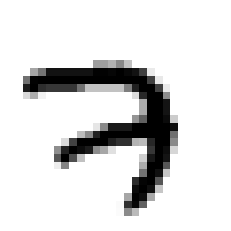

In [120]:
plt.imshow(X_train[0],cmap='binary')
plt.axis("off")
plt.show()

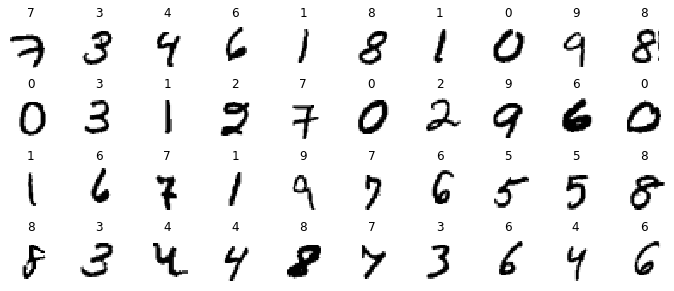

In [121]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [122]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [123]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [124]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [125]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [126]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5887 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

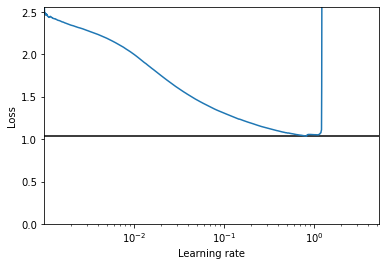

In [127]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")


In [128]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [129]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [130]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

In [131]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [132]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2376 - accuracy: 0.9273 - val_loss: 0.1056 - val_accuracy: 0.9672
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0944 - accuracy: 0.9710 - val_loss: 0.0880 - val_accuracy: 0.9758
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0656 - accuracy: 0.9793 - val_loss: 0.0732 - val_accuracy: 0.9788
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0465 - accuracy: 0.9847 - val_loss: 0.0740 - val_accuracy: 0.9796
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.0729 - val_accuracy: 0.9798
Epoch 6/100
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0700 - val_accuracy: 0.9830
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0756 - val_ac

In [133]:
model = keras.models.load_model("my_mnnist_model.h5")
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 824us/step - loss: 0.0662 - accuracy: 0.0987


[0.06621547788381577, 0.09870000183582306]

In [135]:
%tensorboard --logdir=./my_mnist_logs --port=6007